In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

<Axes: xlabel='Month'>

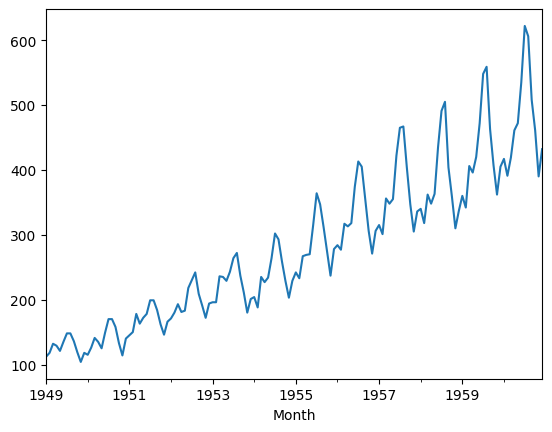

In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'

df = pd.read_csv(url)
df.index = pd.to_datetime(df['Month'])

df['Passengers'].plot()

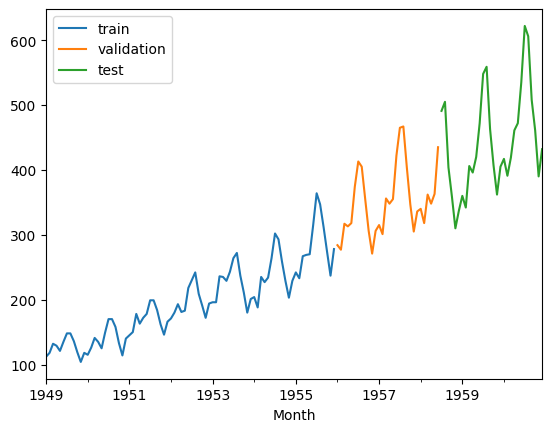

In [7]:
train_set = df[:84]['Passengers']
validation_set = df[84:114]['Passengers']
test_set = df[114:]['Passengers']

train_set.plot(label='train')
validation_set.plot(label='validation')
test_set.plot(label='test')

plt.legend()

In [10]:
def naive(ser):
    return [ser[-1]] * 12


lookback = 24
horizon = 12

In [16]:
def to_series(values, start_ind):
    return pd.Series(values, index=df.index[start_ind:start_ind+len(values)])


validation_start = 84

x1 = df[validation_start-lookback:validation_start]['Passengers']

y1 = naive(x1)
y1 = to_series(y1, validation_start)

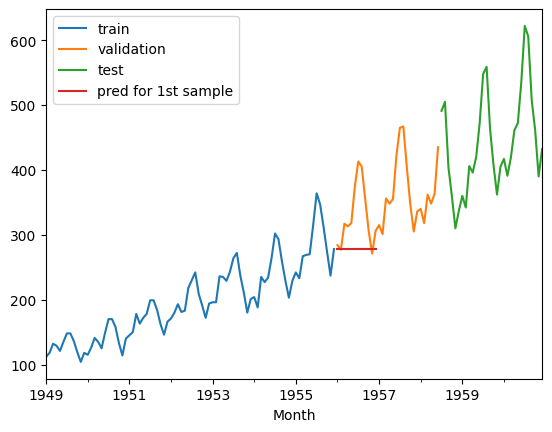

In [17]:
train_set.plot(label='train')
validation_set.plot(label='validation')
test_set.plot(label='test')

y1.plot(label='pred for 1st sample')

plt.legend()

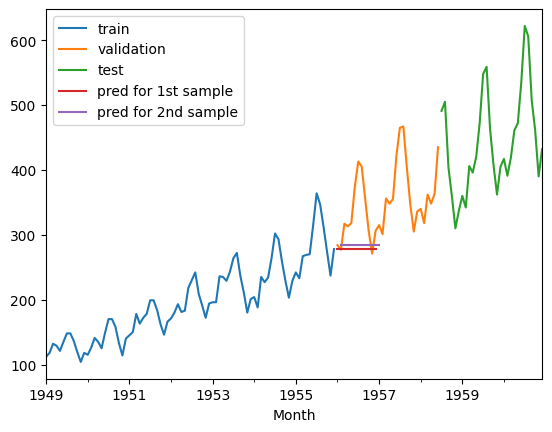

In [19]:
def predict_validation(i):
    x1 = df[validation_start-lookback+i:validation_start+i]['Passengers']
    y1 = naive(x1)
    y1 = to_series(y1, validation_start+i)
    return y1


y2 = predict_validation(1)

train_set.plot(label='train')
validation_set.plot(label='validation')
test_set.plot(label='test')

y1.plot(label='pred for 1st sample')
y2.plot(label='pred for 2nd sample')

plt.legend()

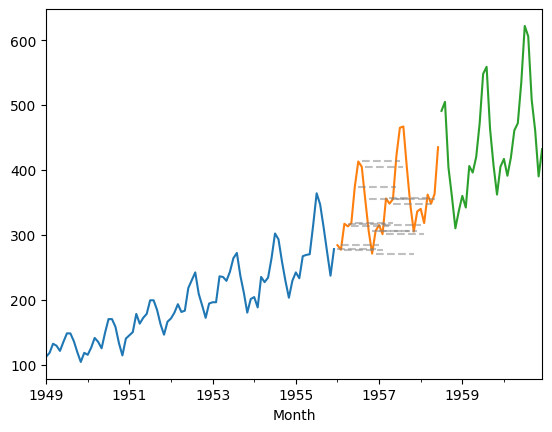

In [21]:
preds = []

for i in range(len(validation_set)-horizon):
    y = predict_validation(i)
    preds.append(y)


train_set.plot(label='train')
validation_set.plot(label='validation')
test_set.plot(label='test')

for p in preds:
    p.plot(color='0.5', ls='--', alpha=0.5)

In [25]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

errors = []
for i in range(len(preds)):
    y_true = validation_set[i:i+horizon]
    y_pred = preds[i]
    error = mae(y_true, y_pred)
    errors.append(error)
    print(f'MAE for series {i+1}: {error}')


print('Overall error:', np.mean(errors))

MAE for series 1: 51.583333333333336
MAE for series 2: 50.166666666666664
MAE for series 3: 56.833333333333336
MAE for series 4: 34.083333333333336
MAE for series 5: 37.333333333333336
MAE for series 6: 39.25
MAE for series 7: 47.583333333333336
MAE for series 8: 72.75
MAE for series 9: 72.58333333333333
MAE for series 10: 51.833333333333336
MAE for series 11: 63.75
MAE for series 12: 94.91666666666667
MAE for series 13: 63.416666666666664
MAE for series 14: 59.5
MAE for series 15: 70.91666666666667
MAE for series 16: 40.25
MAE for series 17: 40.083333333333336
MAE for series 18: 40.75
Overall error: 54.86574074074074


In [24]:
errors

[51.583333333333336,
 50.166666666666664,
 56.833333333333336,
 34.083333333333336,
 37.333333333333336,
 39.25,
 47.583333333333336,
 72.75,
 72.58333333333333,
 51.833333333333336,
 63.75,
 94.91666666666667,
 63.416666666666664,
 59.5,
 70.91666666666667,
 40.25,
 40.083333333333336,
 40.75]

In [27]:
def build_dset(dset, lookback, horizon):
    data = pd.concat([dset.shift(-i) for i in range(lookback+horizon)], axis=1).dropna()
    data.columns = range(-lookback, horizon)
    data.index = dset.index[-len(data):]
    return data.iloc[:, :lookback], data.iloc[:, lookback:]


x_train, y_train = build_dset(train_set, lookback, horizon)

In [33]:
x_train.head()

,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1
Month,,,,,,,,,,,,,,,,,,,,,
1951-12-01,112,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,...,141.0,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0
1952-01-01,118,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,...,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0,145.0
1952-02-01,132,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,...,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0,145.0,150.0
1952-03-01,129,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0,...,149.0,170.0,170.0,158.0,133.0,114.0,140.0,145.0,150.0,178.0
1952-04-01,121,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0,126.0,...,170.0,170.0,158.0,133.0,114.0,140.0,145.0,150.0,178.0,163.0


In [29]:
y_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
Month,,,,,,,,,,,,
1951-12-01,145.0,150.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0
1952-01-01,150.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0,171.0
1952-02-01,178.0,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0,171.0,180.0
1952-03-01,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0,171.0,180.0,193.0
1952-04-01,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0,171.0,180.0,193.0,181.0


<Axes: >

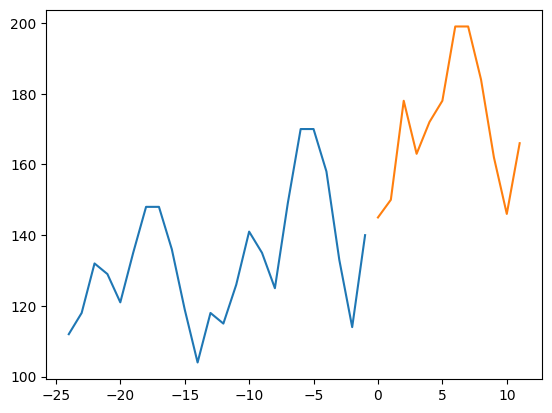

In [31]:
x_train.iloc[0].plot()
y_train.iloc[0].plot()

In [32]:
len(x_train)

49

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [39]:
x, y = build_dset(df['Passengers'], lookback, horizon)

<ipython-input-44-360b9b40d7cc>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x['1955-12']


,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1
Month,,,,,,,,,,,,,,,,,,,,,
1955-12-01,196,196.0,236.0,235.0,229.0,243.0,264.0,272.0,237.0,211.0,...,235.0,227.0,234.0,264.0,302.0,293.0,259.0,229.0,203.0,229.0


In [46]:
preds = lr.predict(x['1955-12'])

<ipython-input-46-89a9deb9ec2b>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  preds = lr.predict(x['1955-12'])


ValueError: ignored

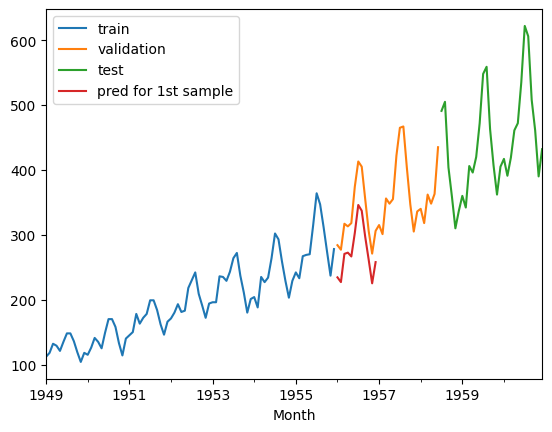

In [51]:
train_set.plot(label='train')
validation_set.plot(label='validation')
test_set.plot(label='test')

pd.Series(preds.flatten(), index=validation_set.index[:12]).plot(label='pred for 1st sample')

plt.legend()